#### Os dados
Neste dados estão dividos em 2 arquivos o SalesFacts.csv é o dados.xslx, eles contêm informações sobre vendas de produtos de um determindado setor.

**SalesFacts:** Esta em um arquivo csv separad devido ao pois contêm 1260752 dados, mais que o limite aceito pelo excel(1.048.576 linhas).
Ele contêm todos os registros de vendas feitas no setor, contendo dados sobre o ID do produto vendido, a data da venda, zip do local aonde a venda foi realizada, unidades vendidas e a receita da venda.

**Dados.xslx:** Este arquivo contêm tabelas complemetares ao saleFacts, como as informações sobre os produtos, sobre os fabricantes, os locais de vendas e datas. Ele contêm 4 tabelas: 

- Product: Aqui temos informações sobre os produtos vendidos, tendo o ProductId como chave principal

- Manufacturer: Nesta aba temos as informações sobre as diferentes empresas de fabricação, entres elas a VanArsdel

- Geo: Aqui temos os dados de locais aonde se encontram as vendas. sua chave é o Zip

- Date: Aqui temos as datas em que tiveram negociações feitas



#### As questões

O dados são fornecidos para que se consiga fazer uma análise de como está a as vendas das empresa VanArsdel em relação as demais do setor, tentando encontrar possiveis estrategias de marketing para que esta empresa possa aumentar seu numero de vendas. Com isto pode se observar qual o ponto forte e ponto fraco destas empressa.

Para iniciar pode fazer perguntas simples, gradualmente aumentando suas dificultades, segue algumas perguntas:
- Qual foi a receita total de vendas do setor?
- Qual o periodo de tempo dos dados?
- Qual foi a receita total do ultimo ano observado?
- Como está a evolução das vendas ao longo do tempo?
- Qual zip que foi vendido o maior numero de peças? Qual teve maior receita?
- Qual o produto mais vendido? Qual teve maior receita? Qual é o mais caro?
- Qual o nome do produto com maior receita?
- Qual nome da cidade com maior receita?
- Qual empresa é a lider do setor?
- Como está a receita da VanArsdel em relação as demais fabricantes?
- Como foi a evolução da vendas da VanArsdel ao longo do tempo?
- Compare esta evolução com das demais empresas?
- Qual categoria a VanArdel tem maior numero de vendas?
- Qual segmento a VanArdel tem maior numero de vendas?

### Codigo

In [1]:
#Utilizado devido as deprecated warning da biblioteca pandas em graficos do seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando bibliotecas nescessárias 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importando Dados**

In [3]:
#importando SalesFacts
vendas = pd.read_csv('salesFacts.csv',delimiter='\t')
vendas.head()

,ProductID,Date,Zip,Units,Revenue
0,88,15/02/2000 12:00:00 AM,95605,92,"$926,780.40"
1,2263,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
2,2262,12/11/2008 12:00:00 AM,33178,44,"$177,380.28"
3,764,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"
4,763,27/07/2004 12:00:00 AM,27522,40,"$146,134.80"


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260752 entries, 0 to 1260751
Data columns (total 5 columns):
ProductID    1260752 non-null int64
Date         1260752 non-null object
Zip          1260752 non-null int64
Units        1260752 non-null int64
Revenue      1260711 non-null object
dtypes: int64(3), object(2)
memory usage: 48.1+ MB


In [5]:
#Lendo arquivo Dados
arq = pd.ExcelFile('Dados.xlsx')
arq.sheet_names

['Product', 'Manufacturer', 'Geo', 'Date']

In [6]:
#Lendo tabelas do arquivo
products = pd.read_excel(arq,'Product')
manufacturer = pd.read_excel(arq,'Manufacturer')
geo = pd.read_excel(arq,'Geo')
date = pd.read_excel(arq,'Date')

In [7]:
products.head(3)

,Manufacturer,Category,Segment,Product,ProductID,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
0,VanArsdel,Urban,Convenience,Maximus UC-01,536,Yes,N,7,No
1,VanArsdel,Urban,Convenience,Maximus UC-02,537,Yes,N,7,No
2,VanArsdel,Urban,Convenience,Maximus UC-03,538,Yes,N,7,No


In [8]:
manufacturer.head(3)

,ManufacturerID,Manufacturer,MfgisVanArsdel
0,6,Leo,No
1,12,Quibus,No
2,1,Abbas,No


In [9]:
geo.head(3)

,Zip,City,State,Region,District
0,15201,"Pittsburgh, PA",PA,East,District #13
1,15202,"Pittsburgh, PA",PA,East,District #13
2,15203,"Pittsburgh, PA",PA,East,District #13


In [10]:
date.head(3)

,Date,MonthNo,MonthName,MonthID,Month,Quarter,Year,RunningMonths,Running Year,Running Months,Rolling Period,Rolling Period Sort,MonthIndex
0,36342,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
1,36343,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7
2,36344,7,Jul,199907,Jul-99,Q3,1999,186,16.0,NaN,NaN,NaN,7


## Repondendo questões

**Qual foi a receita total de vendas do setor?**

Para isto primeiro é necessario converter os dados da coluna Revenue para float, porém para isto e necessario retirar os '$' e virgurlas de todos os dados.

In [11]:
def tratarReceita(receita):
    if type(receita) == str:
        receita = receita.replace('$','').replace(',','')
        return float(receita)
vendas['Revenue'] = vendas['Revenue'].apply(tratarReceita)

In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260752 entries, 0 to 1260751
Data columns (total 5 columns):
ProductID    1260752 non-null int64
Date         1260752 non-null object
Zip          1260752 non-null int64
Units        1260752 non-null int64
Revenue      1260711 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 48.1+ MB


*Resposta*

In [13]:
total = vendas['Revenue'].sum()
print("Total:",total)

Total: 7024409824.949998


**Qual o periodo de tempo dos dados?**

Neste caso é nescessario converter a coluna Date para datetime, porém uma conversão com a função pd.to_datetime iria custar muito tempo, um apply é a melhor opção

In [14]:
from datetime import datetime
def convertData(data):
    return datetime.strptime(data,'%d/%m/%Y %H:%M:%S %p')
vendas['Date'] = vendas['Date'].apply(convertData)

In [15]:
vendas = vendas.sort_values(by='Date')

In [16]:
vendas.index = vendas['Date']

In [17]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260752 entries, 1999-07-15 12:00:00 to 2014-12-30 12:00:00
Data columns (total 5 columns):
ProductID    1260752 non-null int64
Date         1260752 non-null datetime64[ns]
Zip          1260752 non-null int64
Units        1260752 non-null int64
Revenue      1260711 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 57.7 MB


*Resposta*

O periodo dos dados apresenta vendas de está entre 15/07/1999 a 30/12/2014 

**Qual foi a receita total do ultimo ano observado?**

In [18]:
receita2014 = vendas['2014']['Revenue'].sum()
print("Receita 2014:",receita2014)

Receita 2014: 393703982.91


**Como está a evolução das vendas ao longo do tempo?**

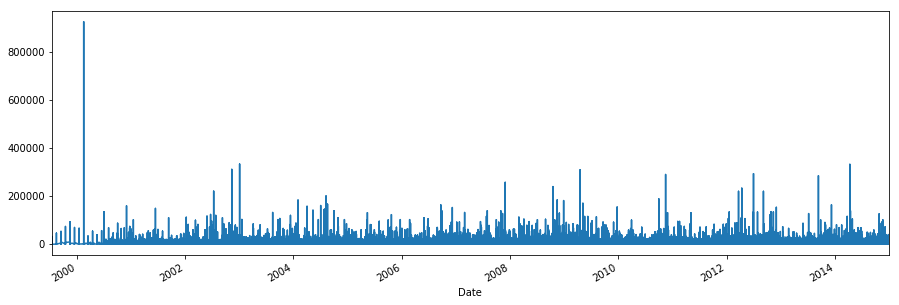

In [19]:
vendas['Revenue'].plot(figsize=(15,5));

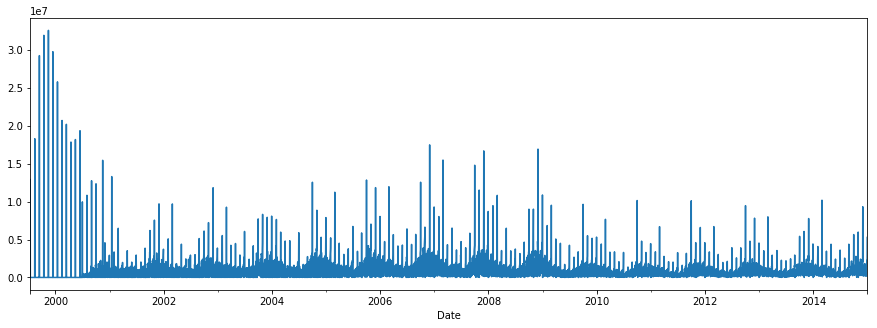

In [20]:
#Agrupado por Dia
grupo = vendas.groupby(pd.Grouper(freq='D')).sum()
grupo['Revenue'].plot(figsize=(15,5));

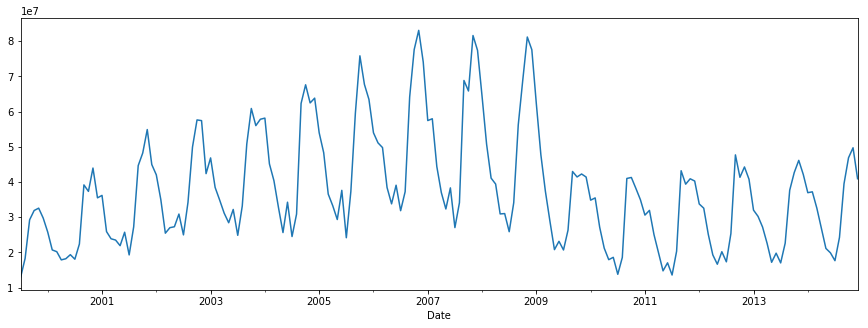

In [21]:
#Agrupado por meses
grupo = vendas.groupby(pd.Grouper(freq='M')).sum()
grupo['Revenue'].plot(figsize=(15,5));

**Qual Zip que foi vendido o maior numero de peças? Qual teve maior receita?**

In [22]:
grupo = vendas.groupby('Zip').sum()

*Resposta Zip com maior numero de peças vendidas*

In [23]:
grupo = grupo.sort_values('Units',ascending=False)
grupo['Units'][:5]

Zip
93065    949
92345    887
92592    849
90501    843
92562    755
Name: Units, dtype: int64

*Resposta qual zip teve maior receita*

In [24]:
grupo = grupo.sort_values('Revenue',ascending=False)
grupo['Revenue'][:5]

Zip
12225    7025565.96
90250    5357184.84
93065    3912102.81
95605    3433229.73
92592    3431184.75
Name: Revenue, dtype: float64

**Qual o produto mais vendido?**

In [25]:
grupo = vendas.groupby('ProductID').sum()
grupo = grupo.sort_values('Revenue',ascending=False)
grupo['Units'][:5]

ProductID
826    10185
487     9624
475     9555
438     9124
506     6792
Name: Units, dtype: int64

**Qual teve maior receita?**

In [26]:
grupo = grupo.sort_values('Revenue',ascending=False)
grupo['Revenue'][:5]

ProductID
826    1.272604e+08
487    1.253002e+08
475    1.182087e+08
438    1.069199e+08
506    1.049833e+08
Name: Revenue, dtype: float64

**Qual mais caro**

In [27]:
grupo['Price'] = grupo['Revenue'] / grupo['Units']
grupo = grupo.sort_values('Price',ascending=False)
grupo['Price'][:5]

ProductID
309    40950.000000
347    40950.000000
296    27716.850000
334    25196.850000
507    24574.291875
Name: Price, dtype: float64

In [28]:
grupo = grupo.drop('Zip',axis=1)
grupo[:5]

,Units,Revenue,Price
ProductID,,,
309,12,491400.00,40950.000000
347,30,1228500.00,40950.000000
296,2,55433.70,27716.850000
334,34,856692.90,25196.850000
507,256,6291018.72,24574.291875


**Qual o nome do produto com maior receita?**

Para isto é nescessario fazer um merge da tabela produtos com a tabela vendas

In [29]:
mergeProd = pd.merge(vendas,products,on='ProductID')
mergeProd.head()

,ProductID,Date,Zip,Units,Revenue,Manufacturer,Category,Segment,Product,isVanArsdel,IsCompeteHide,ManufacturerID,IsCompete
0,2255,1999-07-15 12:00:00,20187,1,692.37,Aliqui,Rural,Productivity,Aliqui RP-52,No,N,2,No
1,2255,1999-07-15 12:00:00,77005,1,692.37,Aliqui,Rural,Productivity,Aliqui RP-52,No,N,2,No
2,2255,1999-07-15 12:00:00,93514,1,692.37,Aliqui,Rural,Productivity,Aliqui RP-52,No,N,2,No
3,2255,1999-07-15 12:00:00,48162,1,692.37,Aliqui,Rural,Productivity,Aliqui RP-52,No,N,2,No
4,2255,1999-07-15 12:00:00,70072,1,692.37,Aliqui,Rural,Productivity,Aliqui RP-52,No,N,2,No


In [30]:
grupoProd = mergeProd.groupby('Product').sum()
grupoProd = grupo.sort_values('Revenue',ascending=False)
grupoProd['Revenue'][:5]

ProductID
826    1.272604e+08
487    1.253002e+08
475    1.182087e+08
438    1.069199e+08
506    1.049833e+08
Name: Revenue, dtype: float64

**Qual nome da cidade com maior receita?**

Para isto é nescessario fazer um merge da tabela geo com a tabela vendas

In [31]:
mergeZip = pd.merge(vendas,geo,on='Zip')
mergeZip.head()

,ProductID,Date,Zip,Units,Revenue,City,State,Region,District
0,2255,1999-07-15 12:00:00,20187,1,692.37,"Warrenton, VA",VA,East,District #07
1,2254,1999-07-15 12:00:00,20187,1,692.37,"Warrenton, VA",VA,East,District #07
2,687,1999-09-15 12:00:00,20187,1,5351.85,"Warrenton, VA",VA,East,District #07
3,2255,1999-11-15 12:00:00,20187,1,692.37,"Warrenton, VA",VA,East,District #07
4,2254,1999-11-15 12:00:00,20187,1,692.37,"Warrenton, VA",VA,East,District #07


In [32]:
grupo = mergeZip.groupby('City').sum()
grupo = grupo.sort_values('Revenue',ascending=False)
grupo['Revenue'][:5]

City
Houston, TX        3.410315e+07
Miami, FL          3.379462e+07
Las Vegas, NV      3.176011e+07
San Diego, CA      3.013660e+07
San Antonio, TX    2.689210e+07
Name: Revenue, dtype: float64

**Qual empresa é a lider do setor?**

In [62]:
grupoEmp = mergeProd.groupby('Manufacturer').sum()

In [63]:
grupoEmp.head()

,ProductID,Zip,Units,Revenue,ManufacturerID
Manufacturer,,,,,
Abbas,1614534,1077226588,19026,1.766478e+08,18166
Aliqui,542054890,13359454172,243746,8.291762e+08,472428
Barba,817738,203421624,4041,5.715005e+07,12027
Currus,261902377,6745272563,134690,5.833612e+08,518088
Fama,2992172,585554695,10113,8.882468e+07,50200


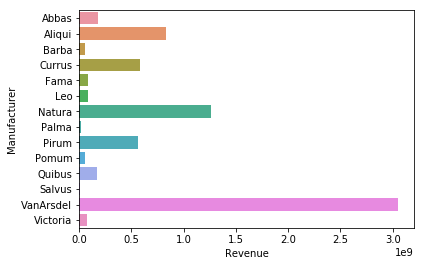

In [64]:
sns.barplot(data=grupoEmp,x='Revenue',y=grupoEmp.index);

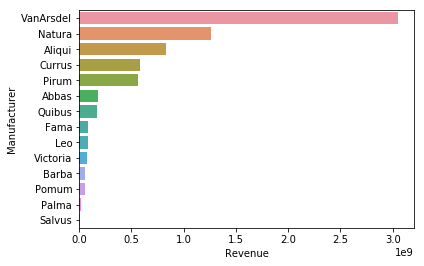

In [65]:
ordem = grupoEmp.sort_values(by='Revenue',ascending=False)
sns.barplot(data=grupoEmp,x='Revenue',y=grupoEmp.index,order=ordem.index);

In [67]:
grupoEmp2

Manufacturer
Salvus       4.586284e+06
Palma        2.124117e+07
Pomum        5.620103e+07
Barba        5.715005e+07
Victoria     7.503567e+07
Leo          8.572037e+07
Fama         8.882468e+07
Quibus       1.737254e+08
Abbas        1.766478e+08
Pirum        5.584890e+08
Currus       5.833612e+08
Aliqui       8.291762e+08
Natura       1.263093e+09
VanArsdel    3.051158e+09
Name: Revenue, dtype: float64

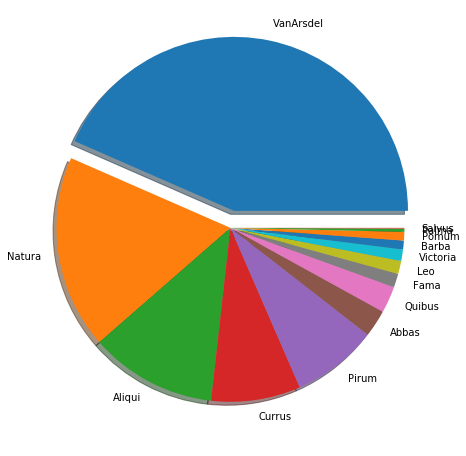

In [80]:
grupoEmp2 = grupoEmp.Revenue.sort_values(ascending =False)
explode= np.zeros(len(grupoEmp2))
explode[0] = 0.1

plt.figure(figsize=(8,8))
plt.pie(grupoEmp2, labels=grupoEmp2.index,explode=explode,shadow=True);

**Como foi a evolução da vendas da VanArsdel ao longo do tempo?**

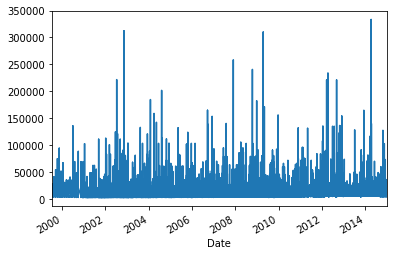

In [38]:
dadosVan = mergeProd[mergeProd['Manufacturer'] == 'VanArsdel']
dadosVan.index = dadosVan['Date']
dadosVan['Revenue'].plot();

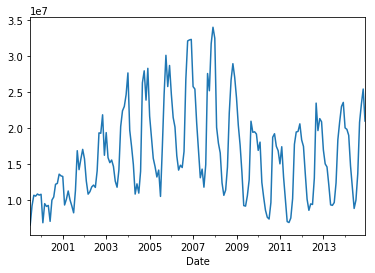

In [81]:
dadosVan.groupby(pd.Grouper(freq='M')).sum()['Revenue'].plot();

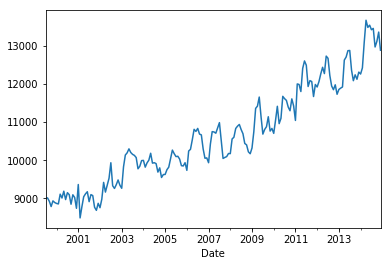

In [82]:
dadosVan.groupby(pd.Grouper(freq='M')).mean()['Revenue'].plot();

**Compare esta evolução com das demais empresas?**

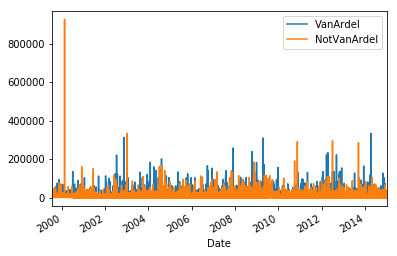

In [40]:
mergeProd.index = mergeProd['Date']
dadosVan = mergeProd[mergeProd['isVanArsdel'] == 'Yes']
dadosVan['Revenue'].plot(label='VanArdel');
dadosNotVan = mergeProd[mergeProd['isVanArsdel'] == 'No']
dadosNotVan['Revenue'].plot(label='NotVanArdel');
plt.legend();

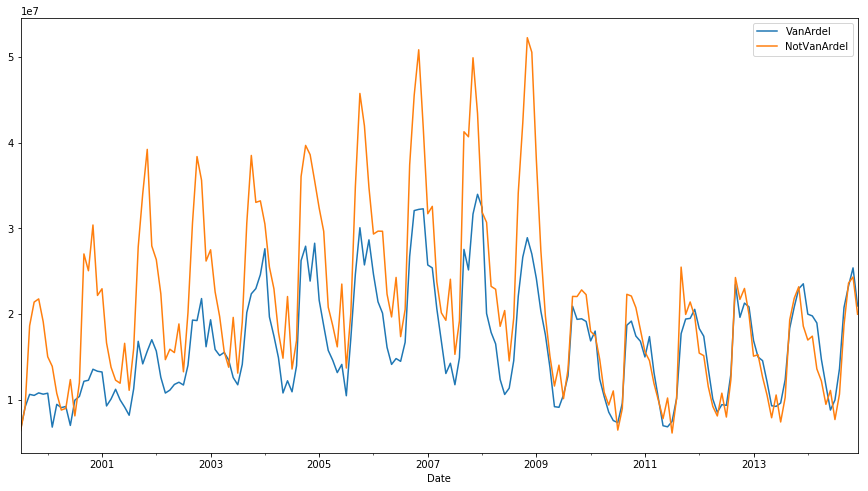

In [83]:
plt.figure(figsize=(15,8));
dadosVan['Revenue'].groupby(pd.Grouper(freq='M')).sum().plot(label='VanArdel');
dadosNotVan['Revenue'].groupby(pd.Grouper(freq='M')).sum().plot(label='NotVanArdel');
plt.legend();

**Pela media dos valores das vendas**

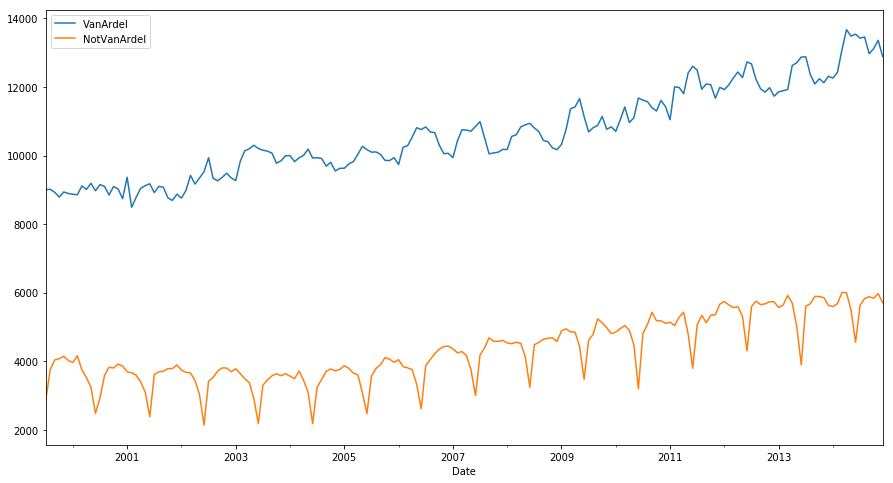

In [84]:
plt.figure(figsize=(15,8));
dadosVan['Revenue'].groupby(pd.Grouper(freq='M')).mean().plot(label='VanArdel');
dadosNotVan['Revenue'].groupby(pd.Grouper(freq='M')).mean().plot(label='NotVanArdel');
plt.legend();

**Qual categoria a VanArdel tem maior numero de vendas?**

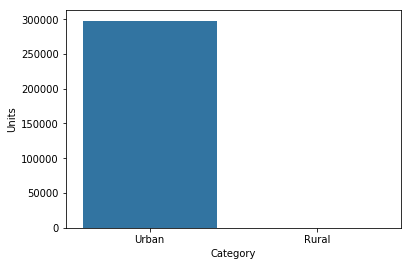

In [86]:
sns.barplot(data=dadosVan,x='Category',y='Units',estimator=np.sum);

**Qual segmento a VanArdel tem maior numero de vendas?**

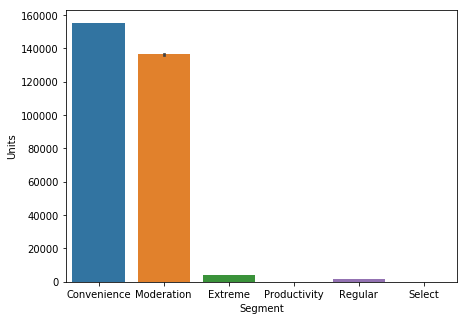

In [92]:
plt.figure(figsize=(7,5))
sns.barplot(data=dadosVan,x='Segment',y='Units',estimator=sum); #Colocar count